Homework 7
Practice training a deep neural network on the CIFAR10 image dataset:

Visualize 20 examples of CIFAR. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes.

Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function. (use a for loop!!)

Using Adam optimization and early stopping, train the network on the CIFAR10 dataset. You’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

Try replacing Batch Normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.)



# Load Libraries and Data

In [1]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train_full = X_train_full.astype('float32')
X_test = X_test.astype('float32')

X_train_full = X_train_full / 255.0
X_test = X_test / 255.0




## Split Training and Validation Sets

In [2]:
# Set First 42000 for training and 8000 for validation

X_valid, X_train = X_train_full[:8000], X_train_full[8000:]

y_valid, y_train = y_train_full[:8000], y_train_full[8000:]

In [3]:
X_train_full.shape

(50000, 32, 32, 3)

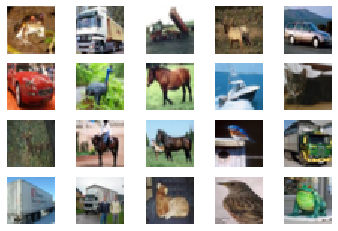

In [4]:
# Visualize first 20 images

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_train_full[i])
    plt.axis('off')

plt.show()

# Define and Train Neural Networks

## Example 1: He_normal Initializer, Adam Optimizer, ELU activation 

In [23]:
# Define Model
earlystopping_cb = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
for layer in range(19):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

#ADAM learnin rate found to be highest at 1e-3
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001,amsgrad=True),
              metrics=["accuracy"])

In [24]:
# Train Model
history1 = model.fit(X_train, y_train, epochs=50, callbacks=[earlystopping_cb], batch_size=64,
                    validation_data=(X_valid, y_valid))

Train on 42000 samples, validate on 8000 samples
Epoch 1/50
42000/42000 [==============================] - 5s 118us/sample - loss: 1.9674 - accuracy: 0.2905 - val_loss: 1.7755 - val_accuracy: 0.3641
Epoch 2/50
42000/42000 [==============================] - 4s 95us/sample - loss: 1.7056 - accuracy: 0.3883 - val_loss: 1.6773 - val_accuracy: 0.4045
Epoch 3/50
42000/42000 [==============================] - 4s 95us/sample - loss: 1.6065 - accuracy: 0.4306 - val_loss: 1.5995 - val_accuracy: 0.4272
Epoch 4/50
42000/42000 [==============================] - 4s 94us/sample - loss: 1.5336 - accuracy: 0.4537 - val_loss: 1.5962 - val_accuracy: 0.4295
Epoch 5/50
42000/42000 [==============================] - 4s 97us/sample - loss: 1.4675 - accuracy: 0.4785 - val_loss: 1.5448 - val_accuracy: 0.4614
Epoch 6/50
42000/42000 [==============================] - 4s 94us/sample - loss: 1.4149 - accuracy: 0.4985 - val_loss: 1.5228 - val_accuracy: 0.4706
Epoch 7/50
42000/42000 [==============================] 

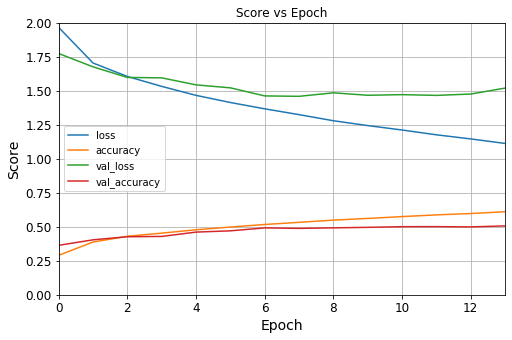

In [26]:
#View loss and Accuracy vs Epoch
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title('Score vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()

Validation accuracy seems to cap around 50%

## Example 2: Batch Normalization, He_normal Initializer, Adam Optimizer, ELU activation 

In [27]:
#Define Model
model2 = keras.models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
model2.add(keras.layers.BatchNormalization())
for layer in range(19):
    model2.add(keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"))
    model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(10, activation="softmax"))

model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001,amsgrad=True),
              metrics=["accuracy"])

In [28]:
#Train Model
history2 = model2.fit(X_train, y_train, epochs=50, callbacks=[earlystopping_cb], batch_size=64,
                    validation_data=(X_valid, y_valid))

Train on 42000 samples, validate on 8000 samples
Epoch 1/50
42000/42000 [==============================] - 15s 349us/sample - loss: 1.8907 - accuracy: 0.3186 - val_loss: 1.7207 - val_accuracy: 0.3907
Epoch 2/50
42000/42000 [==============================] - 10s 231us/sample - loss: 1.6629 - accuracy: 0.4044 - val_loss: 1.5903 - val_accuracy: 0.4378
Epoch 3/50
42000/42000 [==============================] - 10s 231us/sample - loss: 1.5681 - accuracy: 0.4418 - val_loss: 1.5561 - val_accuracy: 0.4450
Epoch 4/50
42000/42000 [==============================] - 10s 233us/sample - loss: 1.4959 - accuracy: 0.4701 - val_loss: 1.4745 - val_accuracy: 0.4744
Epoch 5/50
42000/42000 [==============================] - 10s 227us/sample - loss: 1.4376 - accuracy: 0.4906 - val_loss: 1.4685 - val_accuracy: 0.4761
Epoch 6/50
42000/42000 [==============================] - 10s 241us/sample - loss: 1.3941 - accuracy: 0.5073 - val_loss: 1.4643 - val_accuracy: 0.4806
Epoch 7/50
42000/42000 [=====================

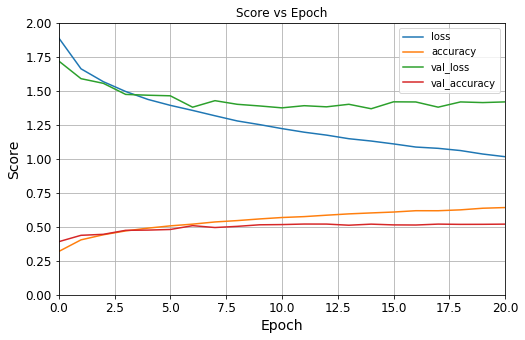

In [30]:
#View loss and Accuracy vs Epoch
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title('Score vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()


In [ ]:
model2.save("model2.h5")

Training time per epoch takes twice as long, but validation accuracy increased slightly to 52 %. It seems to converge faster than the previous model, however, validation and training accuracy converge quickly.

## Example 3: Lecun_normal Initializer, Adam Optimizer, SELU activation 

In [16]:
#Normalize Data
pixel_means = X_train_full.mean(axis=0, keepdims=True)
pixel_stds = X_train_full.std(axis=0, keepdims=True)
X_train_full_scaled = (X_train_full - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

X_valid, X_train = X_train_full_scaled[:8000], X_train_full_scaled[8000:]

In [17]:
#Define Model
model3 = keras.models.Sequential()
model3.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model3.add(keras.layers.Dense(100, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(19):
    model3.add(keras.layers.Dense(100, activation="selu",
                             kernel_initializer="lecun_normal"))
model3.add(keras.layers.Dense(10, activation="softmax"))

model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=0.001,amsgrad=True),
              metrics=["accuracy"])

In [18]:
#Train Model
history = model3.fit(X_train, y_train, epochs=50, callbacks=[earlystopping_cb],
                    validation_data=(X_valid, y_valid), batch_size=64)


Train on 42000 samples, validate on 8000 samples
Epoch 1/50
42000/42000 [==============================] - 7s 156us/sample - loss: 1.9488 - accuracy: 0.3011 - val_loss: 1.7881 - val_accuracy: 0.3551
Epoch 2/50
42000/42000 [==============================] - 5s 117us/sample - loss: 1.7234 - accuracy: 0.3864 - val_loss: 1.6806 - val_accuracy: 0.4126
Epoch 3/50
42000/42000 [==============================] - 5s 122us/sample - loss: 1.6166 - accuracy: 0.4262 - val_loss: 1.5918 - val_accuracy: 0.4351
Epoch 4/50
42000/42000 [==============================] - 5s 124us/sample - loss: 1.5455 - accuracy: 0.4539 - val_loss: 1.5961 - val_accuracy: 0.4461
Epoch 5/50
42000/42000 [==============================] - 5s 124us/sample - loss: 1.4812 - accuracy: 0.4773 - val_loss: 1.5306 - val_accuracy: 0.4554
Epoch 6/50
42000/42000 [==============================] - 5s 124us/sample - loss: 1.4318 - accuracy: 0.4963 - val_loss: 1.5190 - val_accuracy: 0.4764
Epoch 7/50
42000/42000 [===========================

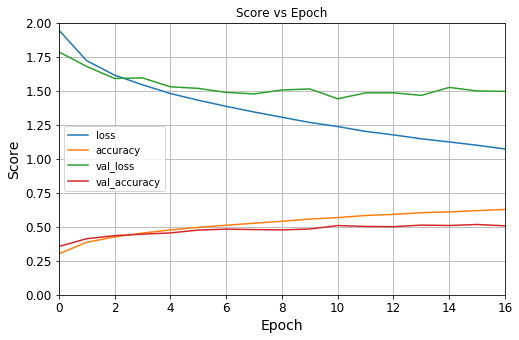

In [31]:
#View loss and Accuracy vs Epoch
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.title('Score vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()

Selu activation causes it to converge quickly, but plateaus at 51.3%.